# [Chapter 10 ]

*KU LeeDongGyu*

## 1. Introduction
---

In [1]:
# 10-1)
# 딥러닝을 잘하는 방법-1번째 : 깊게 들어가는 방법에 대한 이야기.
#
# XOR문제는 2개의 층을 쌓아서 풀 수있다는 이야기를 지난시간에 했다.
# 이때, sigmoid ftn을 activation function이라고 함.(네트워크에서)
#
# XOR은 2단으로 했지만, 3단도 어렵지 않게 적용할 수 있다.
# bias와 W들의 shape의 숫자가 어떻게 따라가는지 확인하면서 보자.
#
# 이때, 3개의 층이 있으면, input layer / hidden layer / output layer 이렇게
# 나눠 부르기도 함.  특별한 의미는 없음. 이때 , input , output layer 는
# 양 끝으로 1개의 층씩을 이야기 함. hidden layer은 10개씩 될 수 있음.
#
# 이를 딥 네트워크라고 부름. 또 딥러닝이라고 부름.
# tensorboard를 통해 시각화 하고 싶으면 이름을 주고 그리면 됨.
# 이게좋은 이유는 복잡한 네트워크를 실행하고 싶을 때 시각적으로 쉽게 볼 수 있기 때문.
#
# 그런데 9단까지 연결함에도 불구하고,
# cost가 떨어지지도 않으면서 정확도가 0.5가 나올수 있다.(XOR에서)
#
# 왜 그럴까???
# -> 이 문제가 바로 backpropagation이라는 알고리즘의 한계임.
# 2,3단의 네트워크는 잘 학습이 되지만 9단,10단은 학습이 잘 되지 않음..
#
# 이는 1보다 작은 값을 계속적으로 곱해 나가면서 계산하기 때문임.
# 작아지는건 계속 작아지는게 발생할 수 있음. (특히 시그모이드함수에서 쉽게 발생)
# 다시말해, (0.01)^2 는 상관없으나, (0.01)^10 이런건 문제가 된다는 말.
# (computational problem 으로 이어짐.)
#
# 즉, input이 output에 영향을 거의 주지 못한다는 말이고, 예측이 제대로 이루어지지 않는다.
# 이를 유식한 말로 vanishing gradient(기울기가 사라짐) 라고 함. (NN winter2 : 1986-2006 - 발전이 안됨.)
#
#
# 또한 시그모이드는 0과 1사이에서 값이 갇혀서 나오기때문에, 만약 이를 input으로 받게되면
# w2와 b2가 수렴하는 과정에서 좀더 명확하게 가르는 구분선을 가짐(즉, 점점 더 값이 0이면 0, 1이면 1)
# -> 이는 그레디언트 소실로 이어지는 결과를 내놓음. ((0.01)^10 이런거의 결과와 비슷)
# <https://excelsior-cjh.tistory.com/177를 참고.>
#
# 시그모이드는 늘 1보다 작은값이기 때문에, 이와같은 문제가 생겼음. 이를 1보다 작아지지 않도록 만들기
# 위해서 ReLU라는 함수를 도입함.
# ReLU : 0보다 작을 경우, return : 0
#          0보다 클 경우, return : 그값 그대로.
#
# 0보다 작을경우 0인 이유는,
# 값이 답도 없이 커지거나 작아질수 있는것을 방지하고자,
# 음수이면 0으로 모형을 안정화시켜서 제한시켜버림! (내생각)
#
#
# 하지만 ReLU가 음수들을 모두 0으로 처리하기 때문에 한번 음수가 나오면
# 더이상 그 노드는 학습되지 않는다는 단점이 한가지 생긴다.
# 따라서 간단한 네트워크에 대해서는 오히려 좋지 않은 성능을 낼 수도 있다.
# (물론 이것 때문에 leaky ReLU나 다른 ReLU 함수들이 있기도 하다.)
# <구체적으로는 여기 참고. http://nmhkahn.github.io/NN>
#
# 우리는 지금까지 sigmoid함수를 NN에서 써왔지만, 앞으로는 ReLU를 쓰는것이 좋다!!
# ex) L1 = tf.nn.relu(tf.matmul(X,W1)+b1) // tip) max(0,x) 이렇게 사용하면 ReLU임.
# 그래도 마지막의 출력은 sigmoid를 쓴다. 이유는 0에서 1사이의 binary로 출력을 받기 때문.
#
# ReLU는 학습을 시작하자마자 정확도는 1, cost도 거의없게 된다.
# ReLU 말고도 여러개가 있다.
# tanh- 시그모이드를 극복시킴. , Leaky ReLU - max(0.1x,x) , Maxout , ELU(좀더 일반적인 ReLU)
#
# 잘쓰는것은 tanh, Leaky ReLU, ReLU 임. sigmoid는 더이상 사용하지 않는다.
#
# CIFAR-10에서 활성함수를 통한 비교를 해볼때, ReLU시리즈가 괜찮다.
#

In [2]:
# 10-2)
# 딥러닝을 잘하는 방법-2번째
# initialize weights(초기값)를 잘 주는 방법.
#
# Vanishing gradient를 해결하는방법
# 1. ReLU
# 2. 초기값을 잘 주면 된다.
#
# 초기값을 쿨하게 w=0으로 준다면?
# -> backpropagation에 의해 앞쪽의 gradient들이 전부 0이 출력되고, 사라져버린다.
#
# => 절대로 초기값은 0을 주면 안된다. : 학습이 안됨.
# => 2006년에 어떤방식으로 초기화를 시키면 좋을지 힌톤의 논문이 나옴.
# RBM(restricted boltzmann machine) 을 사용해서 초기화를 시행할 수 있음.
# 이를 사용한 딥네트워크를 Deep Belief Nets이라고 함. 지금은 자주 안씀.
# 뭔지는 알고 넘어가기. (RBM!!)
#
# <<RBM의 구조>>
# 2단만 있다고 가정. (입력단, 출력단) - 즉, softmax 1번 적용한 상황.
# restricted라고 부르는 이유는, 각층의 노드들끼리는 서로 연결이 되지 않고
# 층과 층사이에서만 노드들이 연결이 되어있기 때문에 붙여진 이름.
#
#        forward          /       backward       를 시행한다.
#              y1 ㅇ                       y1  ㅇ
#   x1   ㅇ    y2 ㅇ            x1    ㅇ   y2  ㅇ
#   x2   ㅇ    y3 ㅇ            x2    ㅇ   y3  ㅇ
#   x3   ㅇ    y4 ㅇ            x3    ㅇ   y4  ㅇ
#        a        b                   a        b  (a와 b는 단순 선형관계) |=>  Y=XW
#
#  즉 a층에서 b층으로 갈때, weight를 사용해서 b를 계산했다면,
# 역으로 계산하는 경우는 b층에서 같은 weight를 사용해서 a층으로 보내고  (X = YW)
# 이렇게 계산된 x'를 얻는다.
# 마지막으로, x와 x'의 차이가 최저가 되도록 weight를 조절해서 갱신해 나아간다.
# 이를 RBM이라고 부름.
#
# 또 다른말로는 , encoder / decoder라고 함. (암호화 복구화) 라고 부름.
# encoder = forward , decoder = backward ///
#
# 이걸 어떻게 적용할까??
#
# 여러개의 층이 있다면, 나머지층은 관심가지지 말고,
# 두개의 층만 먼저 비교해서 W를 수렴시키고, 이어서 두 층으로 W를 수렴시키고... 이를 반복함.
#
# 이런걸 DEEP Belief Network라고 함. (RBM이 여러층이 적용된것)
# 그리고 이렇게 얻어진 W들이 초기값으로 사용값으로 사용함. 이게 잘된다는것도 볼 수 있음.
#
# 그리고 이후, 데이터를 통해 가진 초기값들 W을 통해 학습을 시켜버림. 그러나 금방 학습됨.
# (이미 정보가 사용되었기때문.) 빨리 수렴했기에, Fine Tuning이라는 말로도 사용한다.
# 이게 2006년도에 세계를 깜짝 놀라게함. (초기화를 잘줌.)
#
# <이후의 좋은소식>
# RBM 을 굳이 안줘도 된다 - 간단한 초기값을 줘도 됨.
# 2010년에 나온 논문 : 한개의 층 안에 있는 노드들이 몇개 입력,
# 몇개 출력인지만 보고도 초기값을 알 수 있다.
# W의 초기값을 랜덤하게 주되, in과 out의 개수에서 root(in개수)를 나눠줘도 괜찮더라
# W = np.random.randn(fan_in , fan_out ) / np.sqrt(fan_in)
#
# 2015년에 나온 논문 : 2010과 비슷하지만,
# W = np.random.randn(fan_in , fan_out ) / np.sqrt(fan_in / 2) <-- /2하면 잘되더라.
#
# 연구자들이 여러가지 방법으로 초기화 하는방법을 시도해본 자료를 확인할 수 있음.
#
# 이 분야는 아직도 연구가 많이되고 있는 분야임. 초기값 세팅은 아직도 모른다는 뜻.
# 결론적으로는 여러가지를 시행해보는것이 좋다.
#

In [3]:
# 10-3)
# 딥러닝을 잘하는 방법-3번째 : dropout 과 model ensemble
#
# 이를 하는 이유는 overfitting과 관련됨.
# overfitting이란 막 구부리는 것을 이야기 했음. (데이터를 분류하기 위해 선을 구부림)
#
# 이건 어떻게 확인할 수 있을까?
# - > 트레이닝으로는 정확도가 99%지만, 테스트로는 85%임.
# : 실전에서 사용하면 별로 좋지 않다.
#
# <overfitting의 확인>
# 일반적인 모형이라면,
# y축 : Error, x축 : 층수 의 그래프를 가질때,
# 보통 test는 train보다 위에 곡선을 지닌채 그려진다. (이는 그려보면 당연하다)
#
# 이때 train은 층이 많으면 많아질수록 학습력이 올라가기 때문에 error은 떨어진다. 마치 이상이 없는것 처럼 보인다.
# 그러나 test는 error가 어느순간까지 떨어지다가, 다시 error가 올라가는 아래로볼록한 2차함수의 그래프를 지닌다.
#
# 이때, test error가 다시 올라가게 되는 시점부터 우리는 overfitting이라고 부른다.
#
#
# overfitting 해결방법
# 1. 학습데이터 더 얻기
# 2. features(변수들)의 수 줄이기. (그럴필요는 없음.)
# 3. regularization 사용
#
# regularization : lambda * sum w^2 과 같은 l2 제약을 걸어버린다.
# lambda가 0.1정도면 굉장히 중요하다고 생각한다고 말할 수 있음.
# 0.01정도면 좀 중요하다.
#
# 4. NN에서는 drop out(그만둬라) 이라는 방법을 통해서도 줄일 수 있다.
# 2014년에 나온 이야기. 재밌다 못해 황당한 이야기.
# 학습할 때 각 층마다 몇개의 노드를 랜덤하게 죽여서 연결고리를 없애 버린다는 뜻.
#
# <dropout의 idea>
# 랜덤하게 몇명만 쉬게 해놓고 정보를 몰빵해서 훈련 시킨 뒤,
# 전체의 변수를 동원해서 목적을 맞추게 만들어버림.
#
# <dropout을 구현하는 것도 어렵지 않다.>
# 이것을 tf로 구현할 때는 한단을 더 만들어 버리면 된다. 이때, dropout_rate는 랜덤하게 정해진다 (룰은 없고, 0.5 보통 줌)
# 주의할 점 : 학습하는 동안에만 dropout을 실행하고,
# 실전(test)에서는 전부를 불러와야 함. 따라서
# dropout_rate를 나중에 옵션으로 1로 되돌려야 함.
#
# dropout_rate = 0.7 은 70%만 노드를 70%만 사용한다는 의미.
#
# <앙상블을 시킨다 란?>
# 예를들어, 내가 독립적으로 NN을 10개 가량 9개정도 deep하게 만든다.
# 그리고 같은 train data (혹은 달라도 상관없음) 으로 각각 학습을 시킨다.
# 이때 , 초기값이 조금씩 다를 수 있으므로 각 모형의 결과는 조금씩 다를 수 있다.
# 그리고 이 10개의 모형을 합쳐버린다. 이후결과를 낸다.
#
# 이게 마치 독립된 전문가 10명에게 물어보고, 어떻게 생각하냐고 물어보고 결론 이끌어
# 내는 듯한 이야기.
# 2%~ 4,5%정도까지 기능이 향상된다. 쓸만하다!
#

In [4]:
# 10-4)
#
# 이제는 네트워크를 쌓는법에 대해서 말해보도록 하겠다.
# FNN 이란, Feedforward Neural Network 임. 우리가 지금까지 층층이 겹쳐서 차례로 쌓아온 모든 신경망들임.
#
# 그런데, 이런형태만 있는것이 아니라 여러구조를 지닐 수 있음.
#
# <Fast forward>
# 2015년도에 3%이하로 이미지넷 떨어진 ResNet임.
# X - ㅁ  - ㅁ  - ㅁ  -  ㅁ  -  ㅁ  -  ㅁ  - ㅁ  -  Y
#         <---------->               <---------->
# 부등호 '<' 에서 '>'로 점프가 일어나게끔 만들 수 있음.
#
# <split & merge>
#         -  ㅁ  -  ㅁ   -  ㅁ -
# X - ㅁ                            +   ㅁ   -  ㅁ   -  Y
#         -  ㅁ  -  ㅁ   -  ㅁ -
# 위처럼, 나눴다가 합치기도 가능. 혹은,
#
# X3  ㅁ  - ㅁ  -  ㅁ   -
#
# X2  ㅁ  - ㅁ  -  ㅁ    -  +  ㅁ  -  ㅁ  -  ㅁ - Y
#
# X1  ㅁ  - ㅁ  -  ㅁ   -
#
# 형태가 조금 다르긴 하지만, 위의 경우는 CNN임.
#
#
# <Recurrent Network>
#
#      Y
#      |
#     ㅁ  -  ㅁ  -  ㅁ
#      |     |       |
#     ㅁ  -  ㅁ  -  ㅁ
#      |     |       |
#     ㅁ  -  ㅁ  -  ㅁ
#      |     |       |
#     X1     X2    X3
#
# 옆으로도 쌓는걸로 바꿀 수 있음.  이 경우가 RNN임.
#
# 이렇게 네트워크를 다양하게 조합해보고, 좋은경우가 나온다면 나만의 deep network가 될 수 있음.
# 이제는 나의 상상력으로 레고블럭을 조립해서 쌓으면 됨.
#
# 여기까지 오면, 딥러닝에 대한 전반적인 내용이 끝남.



## 2. Mnist : Naive form
---

In [10]:
#### mnist_softmax
# Lab 7 Learning rate and Evaluation
import tensorflow as tf
import matplotlib.pyplot as plt
import random

In [3]:
from tensorflow.examples.tutorials.mnist import input_data

In [4]:
tf.set_random_seed(777)  # reproducibility

# Check out https://www.tensorflow.org/get_started/mnist/beginners for
# more information about the mnist dataset
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True) #one_hot기능 키고 데이터 가져옴.

W0826 16:05:15.120537  1732 deprecation.py:323] From <ipython-input-4-6f6c9bf6a3ca>:5: read_data_sets (from tensorflow.contrib.learn.python.learn.datasets.mnist) is deprecated and will be removed in a future version.
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
W0826 16:05:15.132058  1732 deprecation.py:323] From C:\Users\82104\Anaconda3\envs\tensorflow\lib\site-packages\tensorflow\contrib\learn\python\learn\datasets\mnist.py:260: maybe_download (from tensorflow.contrib.learn.python.learn.datasets.base) is deprecated and will be removed in a future version.
Instructions for updating:
Please write your own downloading logic.
W0826 16:05:15.135057  1732 deprecation.py:323] From C:\Users\82104\Anaconda3\envs\tensorflow\lib\site-packages\tensorflow\contrib\learn\python\learn\datasets\mnist.py:262: extract_images (from tensorflow.contrib.learn.python.learn.datasets.mnist) is deprecated and will be removed in a future version.
I

Extracting MNIST_data/train-images-idx3-ubyte.gz


W0826 16:05:15.484085  1732 deprecation.py:323] From C:\Users\82104\Anaconda3\envs\tensorflow\lib\site-packages\tensorflow\contrib\learn\python\learn\datasets\mnist.py:267: extract_labels (from tensorflow.contrib.learn.python.learn.datasets.mnist) is deprecated and will be removed in a future version.
Instructions for updating:
Please use tf.data to implement this functionality.
W0826 16:05:15.488083  1732 deprecation.py:323] From C:\Users\82104\Anaconda3\envs\tensorflow\lib\site-packages\tensorflow\contrib\learn\python\learn\datasets\mnist.py:110: dense_to_one_hot (from tensorflow.contrib.learn.python.learn.datasets.mnist) is deprecated and will be removed in a future version.
Instructions for updating:
Please use tf.one_hot on tensors.
W0826 16:05:15.562087  1732 deprecation.py:323] From C:\Users\82104\Anaconda3\envs\tensorflow\lib\site-packages\tensorflow\contrib\learn\python\learn\datasets\mnist.py:290: DataSet.__init__ (from tensorflow.contrib.learn.python.learn.datasets.mnist) is

Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [8]:
# input place holders
X = tf.placeholder(tf.float32, [None, 784]) #변수가 784개
Y = tf.placeholder(tf.float32, [None, 10])  #0~9까지 10개

# weights & bias for nn layers
W = tf.Variable(tf.random_normal([784, 10])) #784개가 입력.  층은 1개.
b = tf.Variable(tf.random_normal([10]))

In [12]:
# parameters
learning_rate = 0.001
batch_size = 100
num_epochs = 10
num_iterations = int(mnist.train.num_examples / batch_size)

hypothesis = tf.matmul(X, W) + b

In [10]:
# define cost/loss & optimizer
cost = tf.reduce_mean(
    tf.nn.softmax_cross_entropy_with_logits_v2(
        logits=hypothesis, labels=tf.stop_gradient(Y)
    )
)
train = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost) #adam쓰자.

correct_prediction = tf.equal(tf.argmax(hypothesis, axis=1), tf.argmax(Y, axis=1)) #예측이 제대로 됬나?
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32)) #정확도

Epoch: 0001, Cost: 5.765637882
Epoch: 0002, Cost: 1.773946001
Epoch: 0003, Cost: 1.118679611
Epoch: 0004, Cost: 0.869421226
Epoch: 0005, Cost: 0.736994557
Epoch: 0006, Cost: 0.652984450
Epoch: 0007, Cost: 0.595106403
Epoch: 0008, Cost: 0.551014771
Epoch: 0009, Cost: 0.517697807
Epoch: 0010, Cost: 0.490603763
Learning Finished!
Accuracy: 0.8921
Label:  [7]
Prediction:  [7]


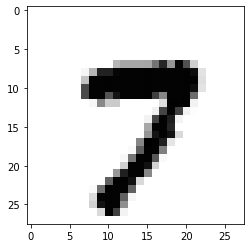

In [13]:
# train my model
with tf.Session() as sess:
    # initialize
    sess.run(tf.global_variables_initializer())

    for epoch in range(num_epochs): #range를 써서 받는다. 명심!
        avg_cost = 0

        for iteration in range(num_iterations):
            batch_xs, batch_ys = mnist.train.next_batch(batch_size)
            _, cost_val = sess.run([train, cost], feed_dict={X: batch_xs, Y: batch_ys})
            avg_cost += cost_val / num_iterations

        print(f"Epoch: {(epoch + 1):04d}, Cost: {avg_cost:.9f}")

    print("Learning Finished!")

    # Test model and check accuracy
    print(
        "Accuracy:",
        sess.run(accuracy, feed_dict={X: mnist.test.images, Y: mnist.test.labels}),
    )

    # Get one and predict
    r = random.randint(0, mnist.test.num_examples - 1)

    print("Label: ", sess.run(tf.argmax(mnist.test.labels[r : r + 1], axis=1)))
    print(
        "Prediction: ",
        sess.run(
            tf.argmax(hypothesis, axis=1), feed_dict={X: mnist.test.images[r : r + 1]}
        ),
    )

    plt.imshow(
        mnist.test.images[r : r + 1].reshape(28, 28),
        cmap="Greys",
        interpolation="nearest",
    )
    plt.show()
##복습이었다.

In [28]:
#정확도 89.2%

## 3. Mnist : Upgrade to Neural Net
---

In [19]:
#mnist_nn
#좀더 깊게 사용.

# Lab 10 MNIST and NN
import tensorflow as tf
import random
# import matplotlib.pyplot as plt
from tensorflow.examples.tutorials.mnist import input_data

In [20]:
tf.set_random_seed(777)  # reproducibility

mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)
# Check out https://www.tensorflow.org/get_started/mnist/beginners for
# more information about the mnist dataset

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [16]:
# parameters
learning_rate = 0.001
training_epochs = 15
batch_size = 100

In [17]:
# input place holders
X = tf.placeholder(tf.float32, [None, 784])
Y = tf.placeholder(tf.float32, [None, 10])

# weights & bias for nn layers
W1 = tf.Variable(tf.random_normal([784, 256])) #256으로 우리가 정한거임. (0~255)
b1 = tf.Variable(tf.random_normal([256]))
L1 = tf.nn.relu(tf.matmul(X, W1) + b1) # tf.nn.softmax대신 tf.nn.relu사용.

W2 = tf.Variable(tf.random_normal([256, 256])) #그냥 256을 좋아해서 사용.
b2 = tf.Variable(tf.random_normal([256]))
L2 = tf.nn.relu(tf.matmul(L1, W2) + b2)

W3 = tf.Variable(tf.random_normal([256, 10]))
b3 = tf.Variable(tf.random_normal([10]))
hypothesis = tf.matmul(L2, W3) + b3   # soft max를 쓰지 않았다.
                                      # 1-1 대응이라 굳이 안쓴듯.
                                      # 우리는 값이 상대적으로 큰지 , 작은지에 관심이 있지 이 수치들이 꼭 0~1사이에 있으며 더했을때 1이되는 확률에 관심이 있는것은 아니다!!
                                      # 이는 머신러닝이기 때문에 그럼.
                                      # 정확도도 쓰나 안쓰나 같다.
#3단 정도 추가.

In [21]:
# define cost/loss & optimizer
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(
    logits=hypothesis, labels=Y))
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

In [22]:
# initialize
sess = tf.Session()
sess.run(tf.global_variables_initializer())

In [23]:
# train my model
for epoch in range(training_epochs):
    avg_cost = 0
    total_batch = int(mnist.train.num_examples / batch_size)

    for i in range(total_batch):
        batch_xs, batch_ys = mnist.train.next_batch(batch_size)
        feed_dict = {X: batch_xs, Y: batch_ys}
        c, _ = sess.run([cost, optimizer], feed_dict=feed_dict)
        avg_cost += c / total_batch

    print('Epoch:', '%04d' % (epoch + 1), 'cost =', '{:.9f}'.format(avg_cost))

print('Learning Finished!')

Epoch: 0001 cost = 190.557439273
Epoch: 0002 cost = 43.598514954
Epoch: 0003 cost = 27.159512139
Epoch: 0004 cost = 19.059618430
Epoch: 0005 cost = 13.923234399
Epoch: 0006 cost = 10.237223160
Epoch: 0007 cost = 7.554562888
Epoch: 0008 cost = 5.633762681
Epoch: 0009 cost = 4.271550367
Epoch: 0010 cost = 3.232859371
Epoch: 0011 cost = 2.432120262
Epoch: 0012 cost = 1.710191885
Epoch: 0013 cost = 1.357601160
Epoch: 0014 cost = 1.147088947
Epoch: 0015 cost = 0.871695409
Learning Finished!


In [24]:
# Test model and check accuracy
correct_prediction = tf.equal(tf.argmax(hypothesis, 1), tf.argmax(Y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
print('Accuracy:', sess.run(accuracy, feed_dict={
      X: mnist.test.images, Y: mnist.test.labels}))

Accuracy: 0.9449


In [25]:
# Get one and predict
r = random.randint(0, mnist.test.num_examples - 1)
print("Label: ", sess.run(tf.argmax(mnist.test.labels[r:r + 1], 1)))
print("Prediction: ", sess.run(
    tf.argmax(hypothesis, 1), feed_dict={X: mnist.test.images[r:r + 1]}))

Label:  [4]
Prediction:  [4]


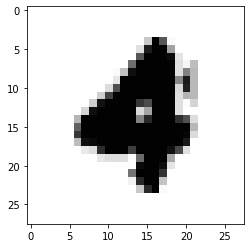

In [26]:
plt.imshow(mnist.test.images[r:r + 1].
          reshape(28, 28), cmap='Greys', interpolation='nearest')
plt.show()

In [27]:
#정확도 94%

## 4. Mnist : More Precise1 - Initializing
---

In [1]:
#mnist_nn_xavier (셰비에)
#초기화와 관련된 issue

# Lab 10 MNIST and Xavier
import tensorflow as tf
import random
# import matplotlib.pyplot as plt

from tensorflow.examples.tutorials.mnist import input_data

tf.set_random_seed(777)  # reproducibility

In [2]:
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)
# Check out https://www.tensorflow.org/get_started/mnist/beginners for
# more information about the mnist dataset

W0826 16:08:46.663810  6752 deprecation.py:323] From <ipython-input-2-e843ee221a27>:1: read_data_sets (from tensorflow.contrib.learn.python.learn.datasets.mnist) is deprecated and will be removed in a future version.
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
W0826 16:08:46.679808  6752 deprecation.py:323] From C:\Users\82104\Anaconda3\envs\tensorflow\lib\site-packages\tensorflow\contrib\learn\python\learn\datasets\mnist.py:260: maybe_download (from tensorflow.contrib.learn.python.learn.datasets.base) is deprecated and will be removed in a future version.
Instructions for updating:
Please write your own downloading logic.
W0826 16:08:46.682809  6752 deprecation.py:323] From C:\Users\82104\Anaconda3\envs\tensorflow\lib\site-packages\tensorflow\contrib\learn\python\learn\datasets\mnist.py:262: extract_images (from tensorflow.contrib.learn.python.learn.datasets.mnist) is deprecated and will be removed in a future version.
I

Extracting MNIST_data/train-images-idx3-ubyte.gz


W0826 16:08:47.020832  6752 deprecation.py:323] From C:\Users\82104\Anaconda3\envs\tensorflow\lib\site-packages\tensorflow\contrib\learn\python\learn\datasets\mnist.py:267: extract_labels (from tensorflow.contrib.learn.python.learn.datasets.mnist) is deprecated and will be removed in a future version.
Instructions for updating:
Please use tf.data to implement this functionality.
W0826 16:08:47.025833  6752 deprecation.py:323] From C:\Users\82104\Anaconda3\envs\tensorflow\lib\site-packages\tensorflow\contrib\learn\python\learn\datasets\mnist.py:110: dense_to_one_hot (from tensorflow.contrib.learn.python.learn.datasets.mnist) is deprecated and will be removed in a future version.
Instructions for updating:
Please use tf.one_hot on tensors.
W0826 16:08:47.107842  6752 deprecation.py:323] From C:\Users\82104\Anaconda3\envs\tensorflow\lib\site-packages\tensorflow\contrib\learn\python\learn\datasets\mnist.py:290: DataSet.__init__ (from tensorflow.contrib.learn.python.learn.datasets.mnist) is

Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [3]:
# parameters
learning_rate = 0.001
training_epochs = 15
batch_size = 100

In [4]:
# input place holders
X = tf.placeholder(tf.float32, [None, 784])
Y = tf.placeholder(tf.float32, [None, 10])

In [5]:
# weights & bias for nn layers
# http://stackoverflow.com/questions/33640581/how-to-do-xavier-initialization-on-tensorflow
W1 = tf.get_variable("W1", shape=[784, 256],
                     initializer=tf.contrib.layers.xavier_initializer())
                     #이 부분만 초기값을 정해주었다.
                     #tf.Variable이 아니다. tf.get_variable을 쓰며, 이때 initializer를 옵션으로 받는다.
                     #tf.contrib.layers.xavier_initializer() 을 잊지말기.
b1 = tf.Variable(tf.random_normal([256]))
#XW +b에서 , b는 관심없고 W만 관심있음. b는 사실 데이터를 직선에 맞게 자연스럽게 해주는 보정의 의미에 가까움.
L1 = tf.nn.relu(tf.matmul(X, W1) + b1)

W2 = tf.get_variable("W2", shape=[256, 256],
                     initializer=tf.contrib.layers.xavier_initializer())
                     #이 부분만 초기값을 정해주었다.
b2 = tf.Variable(tf.random_normal([256]))
L2 = tf.nn.relu(tf.matmul(L1, W2) + b2)

W3 = tf.get_variable("W3", shape=[256, 10],
                     initializer=tf.contrib.layers.xavier_initializer())
                      # 이 부분만 초기값을 정해주었다.
b3 = tf.Variable(tf.random_normal([10]))
hypothesis = tf.matmul(L2, W3) + b3

In [34]:
# define cost/loss & optimizer
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(
    logits=hypothesis, labels=Y))
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)


In [35]:
# initialize
sess = tf.Session()
sess.run(tf.global_variables_initializer())

In [36]:
# train my model
for epoch in range(training_epochs):
    avg_cost = 0
    total_batch = int(mnist.train.num_examples / batch_size)

    for i in range(total_batch):
        batch_xs, batch_ys = mnist.train.next_batch(batch_size)
        feed_dict = {X: batch_xs, Y: batch_ys}
        c, _ = sess.run([cost, optimizer], feed_dict=feed_dict)
        avg_cost += c / total_batch

    print('Epoch:', '%04d' % (epoch + 1), 'cost =', '{:.9f}'.format(avg_cost))

print('Learning Finished!')


Epoch: 0001 cost = 0.313228197
Epoch: 0002 cost = 0.122097014
Epoch: 0003 cost = 0.078792858
Epoch: 0004 cost = 0.058004922
Epoch: 0005 cost = 0.041946506
Epoch: 0006 cost = 0.032163662
Epoch: 0007 cost = 0.024761418
Epoch: 0008 cost = 0.020734011
Epoch: 0009 cost = 0.017540678
Epoch: 0010 cost = 0.015354062
Epoch: 0011 cost = 0.012497261
Epoch: 0012 cost = 0.012071610
Epoch: 0013 cost = 0.009353906
Epoch: 0014 cost = 0.008910819
Epoch: 0015 cost = 0.011038913
Learning Finished!


In [37]:
# Test model and check accuracy
correct_prediction = tf.equal(tf.argmax(hypothesis, 1), tf.argmax(Y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
print('Accuracy:', sess.run(accuracy, feed_dict={
      X: mnist.test.images, Y: mnist.test.labels}))

Accuracy: 0.9766


In [38]:
# Get one and predict
r = random.randint(0, mnist.test.num_examples - 1) #0~ 9999 중 랜덤하게 숫자를 sampling함.
print("Label: ", sess.run(tf.argmax(mnist.test.labels[r:r + 1], 1)))
print("Prediction: ", sess.run(
    tf.argmax(hypothesis, 1), feed_dict={X: mnist.test.images[r:r + 1]}))

Label:  [0]
Prediction:  [0]


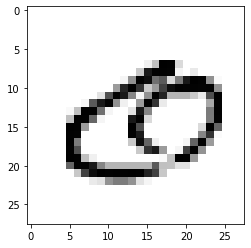

In [39]:
plt.imshow(mnist.test.images[r:r + 1].
          reshape(28, 28), cmap='Greys', interpolation='nearest')
plt.show()


In [40]:
#cost값이 처음부터 매우 낮은상태로 출발한다.
#이로써, 초기값이 매우 잘 적용되었음을 확인 할 수 있다.

In [41]:
#정확도 97.66%

## 5. Mnist : More Precise2 - Deep & Wide
---

In [1]:
#10-4-mnist_nn_deep
#좀더 deep하게 3->5단으로 늘리고, wide하게 256->512로 늘린다.

# Lab 10 MNIST and Deep learning
import tensorflow as tf
import random
# import matplotlib.pyplot as plt

from tensorflow.examples.tutorials.mnist import input_data

tf.set_random_seed(777)  # reproducibility

mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)
# Check out https://www.tensorflow.org/get_started/mnist/beginners for
# more information about the mnist dataset

W0826 16:13:09.790848  1420 deprecation.py:323] From <ipython-input-1-529145e446bb>:13: read_data_sets (from tensorflow.contrib.learn.python.learn.datasets.mnist) is deprecated and will be removed in a future version.
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
W0826 16:13:09.794864  1420 deprecation.py:323] From C:\Users\82104\Anaconda3\envs\tensorflow\lib\site-packages\tensorflow\contrib\learn\python\learn\datasets\mnist.py:260: maybe_download (from tensorflow.contrib.learn.python.learn.datasets.base) is deprecated and will be removed in a future version.
Instructions for updating:
Please write your own downloading logic.
W0826 16:13:09.795849  1420 deprecation.py:323] From C:\Users\82104\Anaconda3\envs\tensorflow\lib\site-packages\tensorflow\contrib\learn\python\learn\datasets\mnist.py:262: extract_images (from tensorflow.contrib.learn.python.learn.datasets.mnist) is deprecated and will be removed in a future version.


Extracting MNIST_data/train-images-idx3-ubyte.gz


W0826 16:13:10.075882  1420 deprecation.py:323] From C:\Users\82104\Anaconda3\envs\tensorflow\lib\site-packages\tensorflow\contrib\learn\python\learn\datasets\mnist.py:267: extract_labels (from tensorflow.contrib.learn.python.learn.datasets.mnist) is deprecated and will be removed in a future version.
Instructions for updating:
Please use tf.data to implement this functionality.
W0826 16:13:10.078869  1420 deprecation.py:323] From C:\Users\82104\Anaconda3\envs\tensorflow\lib\site-packages\tensorflow\contrib\learn\python\learn\datasets\mnist.py:110: dense_to_one_hot (from tensorflow.contrib.learn.python.learn.datasets.mnist) is deprecated and will be removed in a future version.
Instructions for updating:
Please use tf.one_hot on tensors.
W0826 16:13:10.142415  1420 deprecation.py:323] From C:\Users\82104\Anaconda3\envs\tensorflow\lib\site-packages\tensorflow\contrib\learn\python\learn\datasets\mnist.py:290: DataSet.__init__ (from tensorflow.contrib.learn.python.learn.datasets.mnist) is

Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [2]:
# parameters
learning_rate = 0.001
training_epochs = 15
batch_size = 100

In [3]:
# input place holders
X = tf.placeholder(tf.float32, [None, 784])
Y = tf.placeholder(tf.float32, [None, 10])

In [4]:
# weights & bias for nn layers
# http://stackoverflow.com/questions/33640581/how-to-do-xavier-initialization-on-tensorflow
# 명심할것!! 좀 까다로운데, get_variable은 두번실행이안됨... 
#즉, 다시 실행하려면 주피터를 껏다가 다시켜서 실행해줘야함...
W1 = tf.get_variable("W1", shape=[784, 512],
                     initializer=tf.contrib.layers.xavier_initializer())
b1 = tf.Variable(tf.random_normal([512]))
L1 = tf.nn.relu(tf.matmul(X, W1) + b1)

W2 = tf.get_variable("W2", shape=[512, 512],
                     initializer=tf.contrib.layers.xavier_initializer())
b2 = tf.Variable(tf.random_normal([512]))
L2 = tf.nn.relu(tf.matmul(L1, W2) + b2)

W3 = tf.get_variable("W3", shape=[512, 512],
                     initializer=tf.contrib.layers.xavier_initializer())
b3 = tf.Variable(tf.random_normal([512]))
L3 = tf.nn.relu(tf.matmul(L2, W3) + b3)

W4 = tf.get_variable("W4", shape=[512, 512],
                     initializer=tf.contrib.layers.xavier_initializer())
b4 = tf.Variable(tf.random_normal([512]))
L4 = tf.nn.relu(tf.matmul(L3, W4) + b4)

W5 = tf.get_variable("W5", shape=[512, 10],
                     initializer=tf.contrib.layers.xavier_initializer())
b5 = tf.Variable(tf.random_normal([10]))
hypothesis = tf.matmul(L4, W5) + b5

In [6]:
# define cost/loss & optimizer
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(
    logits=hypothesis, labels=Y))
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

In [7]:
# initialize
sess = tf.Session()
sess.run(tf.global_variables_initializer())

In [8]:
# train my model
for epoch in range(training_epochs):
    avg_cost = 0
    total_batch = int(mnist.train.num_examples / batch_size)

    for i in range(total_batch):
        batch_xs, batch_ys = mnist.train.next_batch(batch_size)
        feed_dict = {X: batch_xs, Y: batch_ys}
        c, _ = sess.run([cost, optimizer], feed_dict=feed_dict)
        avg_cost += c / total_batch

    print('Epoch:', '%04d' % (epoch + 1), 'cost =', '{:.9f}'.format(avg_cost))

print('Learning Finished!')

Epoch: 0001 cost = 0.296050163
Epoch: 0002 cost = 0.104989864
Epoch: 0003 cost = 0.070748284
Epoch: 0004 cost = 0.053726584
Epoch: 0005 cost = 0.037672779
Epoch: 0006 cost = 0.036729748
Epoch: 0007 cost = 0.030494655
Epoch: 0008 cost = 0.024453568
Epoch: 0009 cost = 0.024023332
Epoch: 0010 cost = 0.021647108
Epoch: 0011 cost = 0.019483520
Epoch: 0012 cost = 0.018740327
Epoch: 0013 cost = 0.014488840
Epoch: 0014 cost = 0.017866429
Epoch: 0015 cost = 0.014682076
Learning Finished!


In [9]:
# Test model and check accuracy
correct_prediction = tf.equal(tf.argmax(hypothesis, 1), tf.argmax(Y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
print('Accuracy:', sess.run(accuracy, feed_dict={
      X: mnist.test.images, Y: mnist.test.labels}))

Accuracy: 0.98


In [10]:
# Get one and predict
r = random.randint(0, mnist.test.num_examples - 1)
print("Label: ", sess.run(tf.argmax(mnist.test.labels[r:r + 1], 1)))
print("Prediction: ", sess.run(
    tf.argmax(hypothesis, 1), feed_dict={X: mnist.test.images[r:r + 1]}))

Label:  [7]
Prediction:  [7]


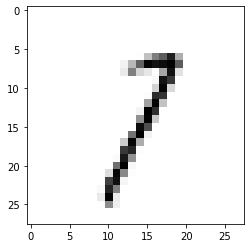

In [13]:
plt.imshow(mnist.test.images[r:r + 1].
          reshape(28, 28), cmap='Greys', interpolation='nearest')
plt.show()

In [14]:
# 정확도 98% // 결과 개선이 그닥 이루어지지 않았다.
# overfitting을 의심할 수 있다.

## 6. Mnist : Prevent Overfitting - Using Dropout

In [1]:
#mnist_nn_dropout
#overfitting을 막는 여러 방법 중 하나로 dropout을 생각 할 수 있음.

# Lab 10 MNIST and Dropout
import tensorflow as tf
import random
# import matplotlib.pyplot as plt

from tensorflow.examples.tutorials.mnist import input_data

tf.set_random_seed(777)  # reproducibility
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)
# Check out https://www.tensorflow.org/get_started/mnist/beginners for
# more information about the mnist dataset

W0826 16:14:32.531333  3580 deprecation.py:323] From <ipython-input-1-108168a80e40>:12: read_data_sets (from tensorflow.contrib.learn.python.learn.datasets.mnist) is deprecated and will be removed in a future version.
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
W0826 16:14:32.539334  3580 deprecation.py:323] From C:\Users\82104\Anaconda3\envs\tensorflow\lib\site-packages\tensorflow\contrib\learn\python\learn\datasets\mnist.py:260: maybe_download (from tensorflow.contrib.learn.python.learn.datasets.base) is deprecated and will be removed in a future version.
Instructions for updating:
Please write your own downloading logic.
W0826 16:14:32.541333  3580 deprecation.py:323] From C:\Users\82104\Anaconda3\envs\tensorflow\lib\site-packages\tensorflow\contrib\learn\python\learn\datasets\mnist.py:262: extract_images (from tensorflow.contrib.learn.python.learn.datasets.mnist) is deprecated and will be removed in a future version.


Extracting MNIST_data/train-images-idx3-ubyte.gz


W0826 16:14:32.893786  3580 deprecation.py:323] From C:\Users\82104\Anaconda3\envs\tensorflow\lib\site-packages\tensorflow\contrib\learn\python\learn\datasets\mnist.py:267: extract_labels (from tensorflow.contrib.learn.python.learn.datasets.mnist) is deprecated and will be removed in a future version.
Instructions for updating:
Please use tf.data to implement this functionality.
W0826 16:14:32.897789  3580 deprecation.py:323] From C:\Users\82104\Anaconda3\envs\tensorflow\lib\site-packages\tensorflow\contrib\learn\python\learn\datasets\mnist.py:110: dense_to_one_hot (from tensorflow.contrib.learn.python.learn.datasets.mnist) is deprecated and will be removed in a future version.
Instructions for updating:
Please use tf.one_hot on tensors.
W0826 16:14:32.954791  3580 deprecation.py:323] From C:\Users\82104\Anaconda3\envs\tensorflow\lib\site-packages\tensorflow\contrib\learn\python\learn\datasets\mnist.py:290: DataSet.__init__ (from tensorflow.contrib.learn.python.learn.datasets.mnist) is

Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [2]:
# parameters
learning_rate = 0.001
training_epochs = 10 #위에서는 계속 15번이지만.. 10번만돌리자...
batch_size = 100
total_batch = int(mnist.train.num_examples / batch_size)

In [3]:
# input place holders
X = tf.placeholder(tf.float32, [None, 784])
Y = tf.placeholder(tf.float32, [None, 10])

# dropout (keep_prob) rate  0.7 on training, but should be 1 for testing
keep_prob = tf.placeholder(tf.float32) #몇 %의 네트워크를 킵할 것인지를 말함.
                                       #placeholder로 놓는 이유는 편하게 하기 위함.

In [4]:
# weights & bias for nn layers
# http://stackoverflow.com/questions/33640581/how-to-do-xavier-initialization-on-tensorflow
W1 = tf.get_variable("W1", shape=[784, 512],
                     initializer=tf.contrib.layers.xavier_initializer())
b1 = tf.Variable(tf.random_normal([512]))
L1 = tf.nn.relu(tf.matmul(X, W1) + b1)
L1 = tf.nn.dropout(L1, keep_prob=keep_prob) #여기를 하나씩 추가해준다.
                                            #tf.nn.dropout을 잊지 말기.
# train 시에는 0.5~0.7
# test 시에는 반드시 1로 해야한다. 이를 위해 placeholder로 정함.

W2 = tf.get_variable("W2", shape=[512, 512],
                     initializer=tf.contrib.layers.xavier_initializer())
b2 = tf.Variable(tf.random_normal([512]))
L2 = tf.nn.relu(tf.matmul(L1, W2) + b2)
L2 = tf.nn.dropout(L2, keep_prob=keep_prob)

W3 = tf.get_variable("W3", shape=[512, 512],
                     initializer=tf.contrib.layers.xavier_initializer())
b3 = tf.Variable(tf.random_normal([512]))
L3 = tf.nn.relu(tf.matmul(L2, W3) + b3)
L3 = tf.nn.dropout(L3, keep_prob=keep_prob)

W4 = tf.get_variable("W4", shape=[512, 512],
                     initializer=tf.contrib.layers.xavier_initializer())
b4 = tf.Variable(tf.random_normal([512]))
L4 = tf.nn.relu(tf.matmul(L3, W4) + b4)
L4 = tf.nn.dropout(L4, keep_prob=keep_prob)

W5 = tf.get_variable("W5", shape=[512, 10],
                     initializer=tf.contrib.layers.xavier_initializer())
b5 = tf.Variable(tf.random_normal([10]))
hypothesis = tf.matmul(L4, W5) + b5

W0826 16:14:36.891613  3580 deprecation.py:506] From <ipython-input-4-4e5db6ee4393>:7: calling dropout (from tensorflow.python.ops.nn_ops) with keep_prob is deprecated and will be removed in a future version.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [5]:
# define cost/loss & optimizer
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(
    logits=hypothesis, labels=Y))
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)
#optimizer는 굉장히 여러개의 최적화가 있다.
#이때, adam이라는 optimizer는 상당히 좋은 tool이다.
#gradient descent 랑 똑같이 하면 됨.

W0826 16:15:53.642408  3580 deprecation.py:323] From <ipython-input-5-3bacfb4869b9>:3: softmax_cross_entropy_with_logits (from tensorflow.python.ops.nn_ops) is deprecated and will be removed in a future version.
Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.



In [6]:
# initialize
sess = tf.Session()
sess.run(tf.global_variables_initializer())

In [7]:
# train my model
for epoch in range(training_epochs):
    avg_cost = 0

    for i in range(total_batch):
        batch_xs, batch_ys = mnist.train.next_batch(batch_size)
        feed_dict = {X: batch_xs, Y: batch_ys, keep_prob: 0.7}
        c, _ = sess.run([cost, optimizer], feed_dict=feed_dict)
        avg_cost += c / total_batch

    print('Epoch:', '%04d' % (epoch + 1), 'cost =', '{:.9f}'.format(avg_cost))

print('Learning Finished!')

Epoch: 0001 cost = 0.469980952
Epoch: 0002 cost = 0.170592028
Epoch: 0003 cost = 0.128200613
Epoch: 0004 cost = 0.105539043
Epoch: 0005 cost = 0.089040644
Epoch: 0006 cost = 0.083587534
Epoch: 0007 cost = 0.074270447
Epoch: 0008 cost = 0.068665093
Epoch: 0009 cost = 0.063915002
Epoch: 0010 cost = 0.057396898
Learning Finished!


In [8]:
# Test model and check accuracy
correct_prediction = tf.equal(tf.argmax(hypothesis, 1), tf.argmax(Y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
print('Accuracy:', sess.run(accuracy, feed_dict={
      X: mnist.test.images, Y: mnist.test.labels, keep_prob: 1})) #반드시 1로 할것.


Accuracy: 0.9829


In [9]:
# Get one and predict
r = random.randint(0, mnist.test.num_examples - 1)
print("Label: ", sess.run(tf.argmax(mnist.test.labels[r:r + 1], 1)))
print("Prediction: ", sess.run(
    tf.argmax(hypothesis, 1), feed_dict={X: mnist.test.images[r:r + 1], keep_prob: 1}))


Label:  [9]
Prediction:  [9]


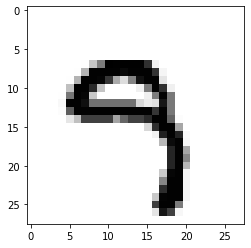

In [11]:
plt.imshow(mnist.test.images[r:r + 1].
          reshape(28, 28), cmap='Greys', interpolation='nearest')
plt.show()


In [12]:
#10번만 돌려도 정확도는 98.29%로 올라감!!.

## 7. Sources
---

- [Main site](https://hunkim.github.io/ml/)
- [Github](https://hunkim.github.io/ml/)